## Boundary to field inference with hypernetworks



In [7]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(["science", "ieee"])

In [8]:
@jax.jit
def mode(theta, n=1):
    return jnp.sin(n * theta)


@jax.jit
def boundary(n, theta, R=1.0):
    x = R * jnp.cos(theta)
    y = R * jnp.sin(theta)
    z = jax.vmap(mode, in_axes=(0, None))(theta, n)
    return x, y, z


@jax.jit
def potential(x, y, n):
    r = jnp.sqrt(x**2 + y**2)
    theta = jnp.arctan2(y, x)
    return jnp.sin(n * theta) * r**n


res = 100
theta = jnp.linspace(0, 2 * jnp.pi, res)
dx, dy, dz = boundary(n=3, theta=theta)
x, y = jnp.meshgrid(jnp.linspace(-1, 1, res), jnp.linspace(-1, 1, res))
z = jax.vmap(jax.vmap(potential, in_axes=(0, 0, None)), in_axes=(1, 1, None))(x, y, 3)
print(z.shape)

(100, 100)


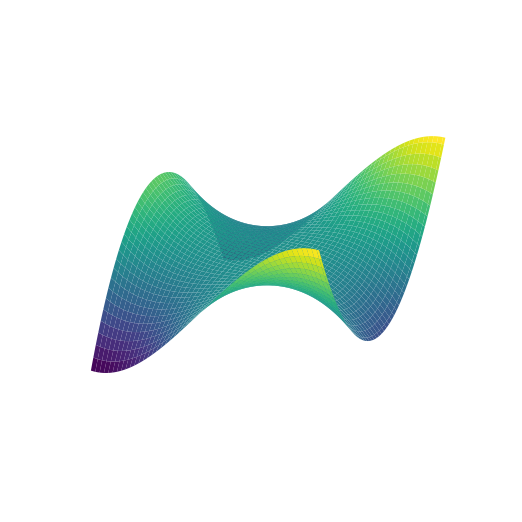

In [17]:
fig = plt.figure(figsize=(1, 1))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(x, y, z, cmap="viridis", edgecolor="none")

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
# ax.set_title("Surface Plot")

ax.axis("off")  # Hide the background 3D axis lines

plt.show()

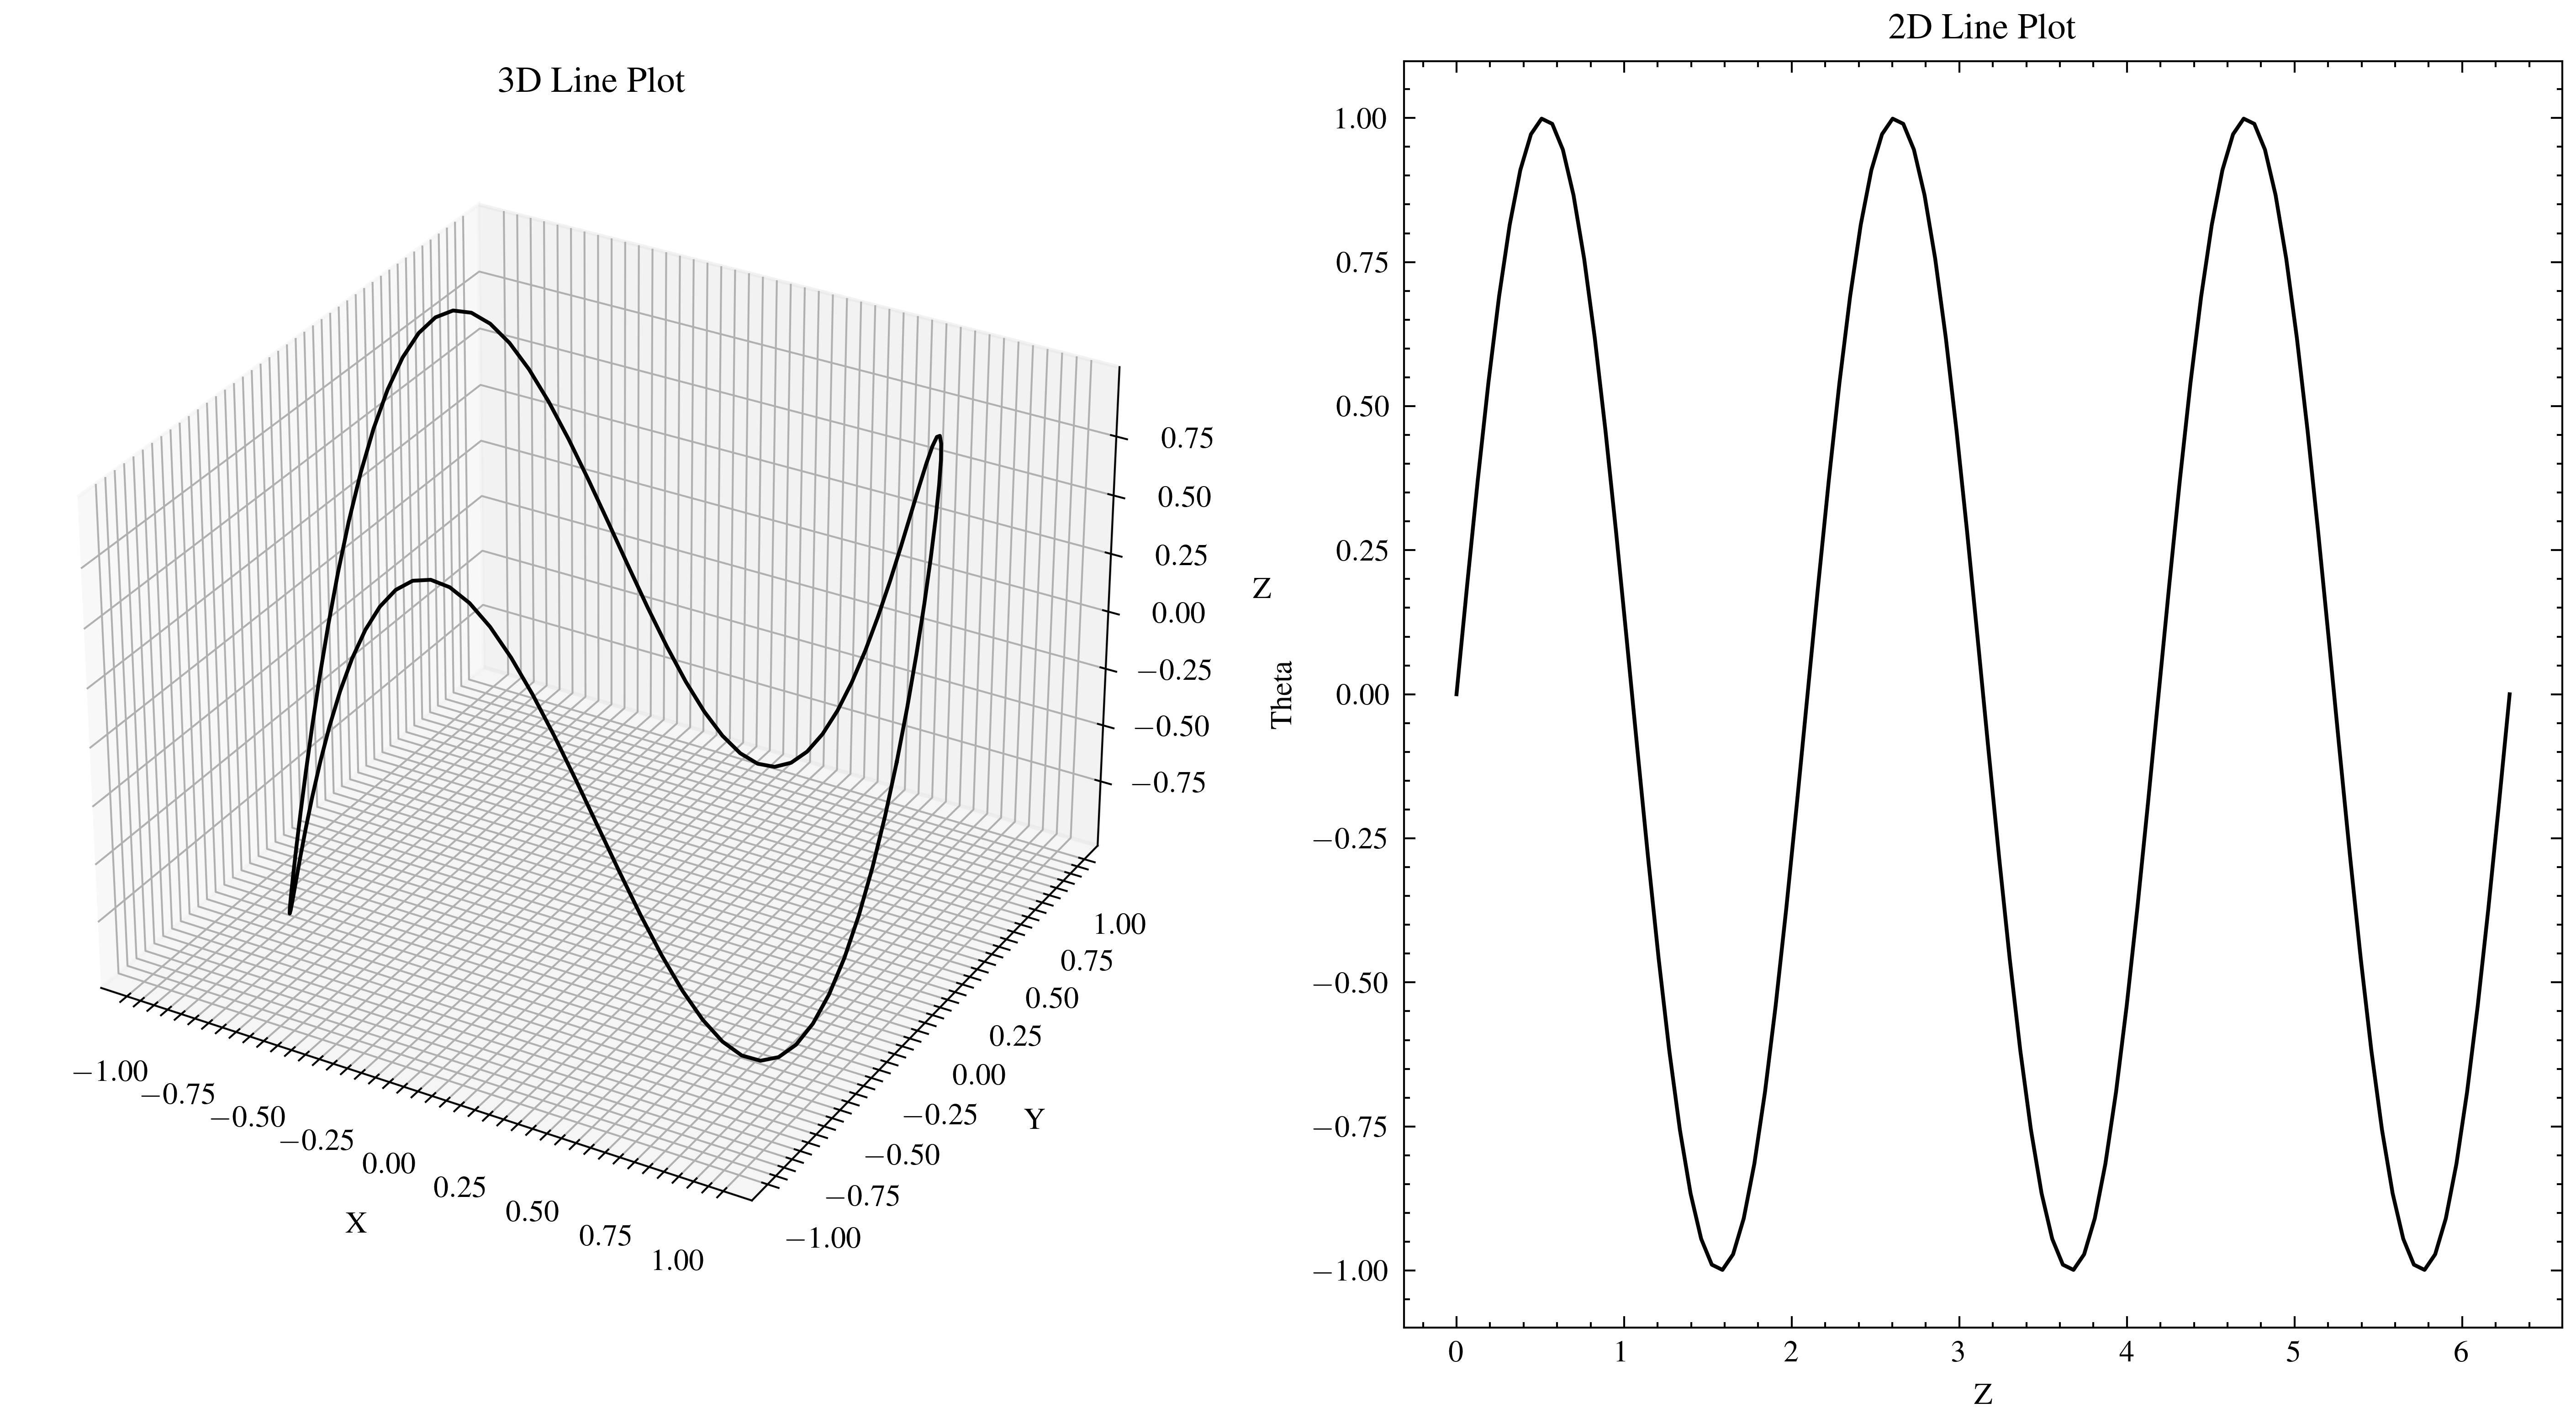

In [10]:
fig = plt.figure(figsize=(12, 6))

# Left subplot: 3D line plot
ax1 = fig.add_subplot(121, projection="3d")
ax1.plot(dx, dy, dz)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_title("3D Line Plot")

# Right subplot: 2D line plot
ax2 = fig.add_subplot(122)
ax2.plot(theta, dz)
ax2.set_xlabel("Z")
ax2.set_ylabel("Theta")
ax2.set_title("2D Line Plot")

# plt.tight_layout()
plt.show()

## PyVista interactive plotting

In [11]:
import numpy as np
import pyvista as pv

# Create a PyVista mesh
points = np.array(jnp.column_stack((x, y, z)))
spline = pv.Spline(points, 1000)
spline.plot(render_lines_as_tubes=True, line_width=10)

# p = pv.Plotter(notebook=True)  # type: ignore
# p.add_mesh(spline, render_lines_as_tubes=True, line_width=10)
# p.show_bounds()
# p.show_axes()
# p.camera_position = "xz"
# p.show()

ValueError: Points array must contain three values per point. Shape is (100, 300) and should be (X, 3)